# Sentiment analysis by Vader


__Objectives__

The primary purpose of this notebook is to use the sentiment analysis tool Vader on LabelFilled_TrueGround_dataset and evaluate the performance of Vader against the ground true label, analyze the results, etc.

###### Install vaderSentiment library

In [1]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import vaderSentiment as vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# The path to the dataset that is produced by this notebook.
Vader_dataset = '../../FYP/3000_analysis_dataset/3000_Vader_dataset.csv'

# The directory used to store the true ground datasets.
datasets_dir = '../../FYP/Clean_dataset/LabelFilled_TrueGround_dataset/'

In [4]:
df = pd.read_csv(datasets_dir+'2000_news_headlines_TrueGround.csv',encoding='latin-1')

In [5]:
df

,Date,Headlines,Author,Tag Text,True_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative
1,17/03/2018,Meal-ordering app Ritual exposes government em...,The Verge,A couple months after Strava unintentionally e...,NaN
2,17/03/2018,"In Spanish Basque Country, Sampling Cider and ...",New York Times,No one really tells you what to do when you fi...,NaN
3,17/03/2018,Perspectives | Scapegoating Becomes a Pre-Elec...,EurasiaNet,Perspectives | Scapegoating Becomes a Pre-Elec...,NaN
4,17/03/2018,Ready for the new moon? Try this guided ritual...,Well+Good,Mindfulness rockstar Kelly Morris is here to l...,NaN
...,...,...,...,...,...
2195,27/08/2022,"9 New Moon Rituals For Intention Setting, Mani...",Experts - MindBodyGreen,MindBodyGreenNew moons are an excellent time t...,positive
2196,27/08/2022,The Importance of Fire Ritual | Burning Man Jo...,Burning Man Journal,The Importance of Fire Ritual ?? Extracting a ...,NaN
2197,27/08/2022,Pune: Woman Made To Bathe In Public As Per Rit...,In Laws,Outlook IndiaA woman in Maharashtra's Pune has...,negative
2198,27/08/2022,Cult Of The Lamb: The Best Rituals (& When To ...,Game Rant,The Lamb gets one free Ritual when they first ...,NaN


In [6]:
# Filter the df to get df that contain entries with graound true label only.
df_no_missing_column = df[df['True_Label'].notna()]

In [7]:
df_no_missing_column

,Date,Headlines,Author,Tag Text,True_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative
5,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive
6,17/03/2018,"Dead chickens, goats from animal sacrifice rit...",County,WOAISAN ANTONIO - Police are questioning suspe...,negative
14,24/03/2018,"Jepitu farmers, fishermen hold thanksgiving ri...",Jakarta Post,Two fishermen fish using a net at the as part ...,positive
20,24/03/2018,Texas authorities: At least 12 arrested for an...,Unknown,SAN ANTONIO (AP) ?? Authorities in Texas have...,negative
...,...,...,...,...,...
2184,20/08/2022,Police in Nigeria find 20 mummified bodies in ...,The Guardian,The GuardianArmed police officers raided the b...,negative
2189,20/08/2022,Police give more details about 20 corpses dem ...,BBC,BBCPolice for Edo State south-south Nigeria sa...,negative
2195,27/08/2022,"9 New Moon Rituals For Intention Setting, Mani...",Experts - MindBodyGreen,MindBodyGreenNew moons are an excellent time t...,positive
2197,27/08/2022,Pune: Woman Made To Bathe In Public As Per Rit...,In Laws,Outlook IndiaA woman in Maharashtra's Pune has...,negative


negative    177
positive     93
Name: True_Label, dtype: int64


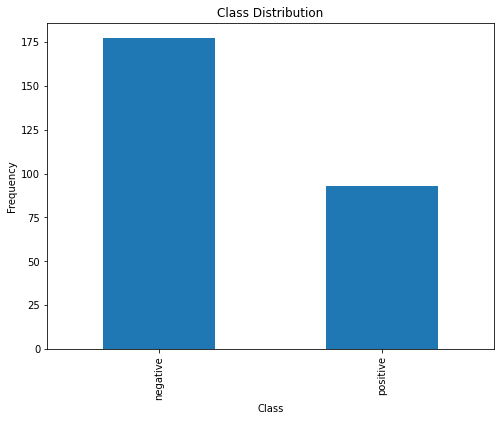

In [8]:
class_counts = df_no_missing_column['True_Label'].value_counts()

# Print numerical breakdown
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Refered the documentation from https://vadersentiment.readthedocs.io/en/latest/index.html (vader offical web)

polarity_scores return a dictionary that contain four different polarity score:

neg: how likely is this text classified as negative

neu: how likely is this text classified as neutral

pos: how likely is this text classified as positive

compound: The calculated overall sentiment score by summing polarity scores of each word in the lexicon and adjusted according to the rules, which takes values from -1 (most negative) to 1 (most positive).

neg, neu and pos scores are probability that the text classified as each sentiment so those three values are added up to 1.

In [10]:
df_copy = df_no_missing_column.copy()
# Apply sentiment analysis on headline column
df_copy['Vader_Headlines_sentiment_score'] = df_copy['Headlines'].apply(lambda x: analyzer.polarity_scores(x))
df_copy['Vader_Headlines_compound_score'] = df_copy['Vader_Headlines_sentiment_score'].apply(lambda x: x['compound'])
# Apply sentiment analysis on Tag Text column
df_copy['Vader_Tag Text_sentiment_score'] = df_copy['Tag Text'].apply(lambda x: analyzer.polarity_scores(x))
df_copy['Vader_Tag Text_compound_score'] = df_copy['Vader_Tag Text_sentiment_score'].apply(lambda x: x['compound'])

In [11]:
df_copy.head()

,Date,Headlines,Author,Tag Text,True_Label,Vader_Headlines_sentiment_score,Vader_Headlines_compound_score,Vader_Tag Text_sentiment_score,Vader_Tag Text_compound_score
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative,"{'neg': 0.612, 'neu': 0.388, 'pos': 0.0, 'comp...",-0.9349,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.8885
5,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive,"{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...",-0.1280,"{'neg': 0.049, 'neu': 0.857, 'pos': 0.094, 'co...",0.3468
6,17/03/2018,"Dead chickens, goats from animal sacrifice rit...",County,WOAISAN ANTONIO - Police are questioning suspe...,negative,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",-0.6486,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.9042
14,24/03/2018,"Jepitu farmers, fishermen hold thanksgiving ri...",Jakarta Post,Two fishermen fish using a net at the as part ...,positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
20,24/03/2018,Texas authorities: At least 12 arrested for an...,Unknown,SAN ANTONIO (AP) ?? Authorities in Texas have...,negative,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",-0.4767,"{'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'comp...",-0.8611


Refered some usecase code from the documentation https://vadersentiment.readthedocs.io/en/latest/pages/code_and_example.html (Vader offical web)


From https://github.com/cjhutto/vaderSentiment recommend the standard threshold to classify the text as either positive, negative and netural used in the literature cited on 'About the Scoring page' as following:

positive sentiment: compound score >= 0.05

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

negative sentiment: compound score <= -0.05

Since my ground truth label only contains two classes 'positive' and 'negative' and there are no examples like slighly positive and slight negative when i did annotation because all the ground truth labelled example has shown the clear polarity that can be inspected at human glance, so i will slightly alter the treshold to accommodate my ground true table for my application.

positive sentiment: compound score >= 0

negative sentiment: compound score < 0

In [12]:
# def classify_sentiment(score):
#     if score >= 0.05:
#         return 'positive'
#     elif score <= -0.05
#         return 'negative'
#     else:
#         return 'netural'

In [13]:
def classify_sentiment(score):
    if score >= 0:
        return 'positive'
    else:
        return 'negative'

In [14]:
# Classify sentiment based on compound score
df_copy['Vader_Headlines_Predicted_Label'] = df_copy['Vader_Headlines_compound_score'].apply(classify_sentiment)
df_copy['Vader_Tag Text_Predicted_Label'] = df_copy['Vader_Tag Text_compound_score'].apply(classify_sentiment)

In [15]:
df_copy.head()

,Date,Headlines,Author,Tag Text,True_Label,Vader_Headlines_sentiment_score,Vader_Headlines_compound_score,Vader_Tag Text_sentiment_score,Vader_Tag Text_compound_score,Vader_Headlines_Predicted_Label,Vader_Tag Text_Predicted_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative,"{'neg': 0.612, 'neu': 0.388, 'pos': 0.0, 'comp...",-0.9349,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.8885,negative,negative
5,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive,"{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...",-0.1280,"{'neg': 0.049, 'neu': 0.857, 'pos': 0.094, 'co...",0.3468,negative,positive
6,17/03/2018,"Dead chickens, goats from animal sacrifice rit...",County,WOAISAN ANTONIO - Police are questioning suspe...,negative,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",-0.6486,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.9042,negative,negative
14,24/03/2018,"Jepitu farmers, fishermen hold thanksgiving ri...",Jakarta Post,Two fishermen fish using a net at the as part ...,positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,positive
20,24/03/2018,Texas authorities: At least 12 arrested for an...,Unknown,SAN ANTONIO (AP) ?? Authorities in Texas have...,negative,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...",-0.4767,"{'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'comp...",-0.8611,negative,negative


###### Save dataset

In [16]:
print('Saving the dataset that contain the classified sentiment by Vader(%s, %s.)' % df_copy.shape)
df_copy.to_csv(Vader_dataset, index=False)
df_copy.shape, df_copy.columns

Saving the dataset that contain the classified sentiment by Vader(270, 11.)


((270, 11),
 Index(['Date', 'Headlines', 'Author', 'Tag Text', 'True_Label',
        'Vader_Headlines_sentiment_score', 'Vader_Headlines_compound_score',
        'Vader_Tag Text_sentiment_score', 'Vader_Tag Text_compound_score',
        'Vader_Headlines_Predicted_Label', 'Vader_Tag Text_Predicted_Label'],
       dtype='object'))

###### Evaluation

Use common metrics for evaluation:

Accuracy: The percentage of correctly classifed sentiment made by the tool. Accuracy = Total correctly classified examples / Total number of examples

Precision: It measures the accuracy of positive predictions. Precision = True positive / (True positive + False positive)

Recall: It measures the ability of the model to identify all the true positives. Recall = True positive / (True positive + False Negative)

F1 Score: The balanced score between precision and recall. The F1 = 2 * ((precision * recall) / (precision + recall))


Evaluate the predictions of headlines

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [18]:
headline_accuracy = accuracy_score(df_copy['True_Label'], df_copy['Vader_Headlines_Predicted_Label'])
headline_precision = precision_score(df_copy['True_Label'], df_copy['Vader_Headlines_Predicted_Label'], average='binary', pos_label='positive')
headline_recall = recall_score(df_copy['True_Label'], df_copy['Vader_Headlines_Predicted_Label'], average='binary', pos_label='positive')
headline_f1 = f1_score(df_copy['True_Label'], df_copy['Vader_Headlines_Predicted_Label'], average='binary', pos_label='positive')

In [19]:
print("Headline Accuracy:", headline_accuracy)
print("Headline Precision:", headline_precision)
print("Headline Recall:", headline_recall)
print("Headline F1 Score:", headline_f1)

Headline Accuracy: 0.8222222222222222
Headline Precision: 0.6717557251908397
Headline Recall: 0.946236559139785
Headline F1 Score: 0.7857142857142858


Based on the confusion matrix for headlines, the number of false positive  example is nearly 5 times greater than false negative examples, which suggests that vader is much weaker at classifing true negative examples

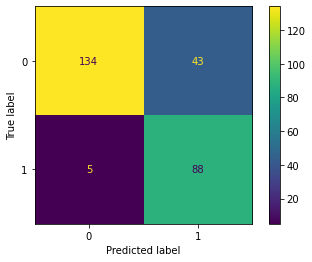

In [20]:
# plot_confusion_matrix
cm = confusion_matrix(df_copy['True_Label'], df_copy['Vader_Headlines_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();


Evaluate the predictions of tag text

In [21]:
TagText_accuracy = accuracy_score(df_copy['True_Label'], df_copy['Vader_Tag Text_Predicted_Label'])
TagText_precision = precision_score(df_copy['True_Label'], df_copy['Vader_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
TagText_recall = recall_score(df_copy['True_Label'], df_copy['Vader_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
TagText_f1 = f1_score(df_copy['True_Label'], df_copy['Vader_Tag Text_Predicted_Label'], average='binary', pos_label='positive')

In [22]:
print("Tag text Accuracy:", TagText_accuracy)
print("Tag text Precision:", TagText_precision)
print("Tag text Recall:", TagText_recall)
print("Tag text F1 Score:", TagText_f1)

Tag text Accuracy: 0.7703703703703704
Tag text Precision: 0.6148148148148148
Tag text Recall: 0.8924731182795699
Tag text F1 Score: 0.7280701754385965


Based on the confusion matrix for tagtext, again the number of false positive examples is nearly 4 times greater than false negative examples , which suggests that vader is much weaker at classifing true negative examples in either tag text or headlines, also here the number of correctly classifed examples are less than the coreectly classified examples in headlines.

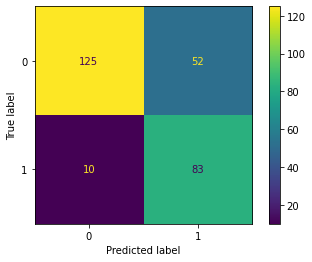

In [23]:
# plot_confusion_matrix
cm = confusion_matrix(df_copy['True_Label'], df_copy['Vader_Tag Text_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [24]:
import matplotlib.pyplot as plt

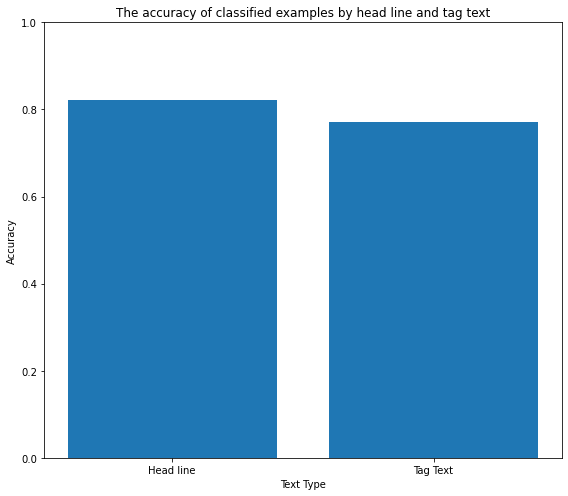

In [25]:
Text_Type = ['Head line', 'Tag Text']
Accuracy = [headline_accuracy,TagText_accuracy]

fig, axs = plt.subplots(figsize=(8, 7))


axs.bar(Text_Type, Accuracy)
axs.set_xlabel('Text Type')
axs.set_ylabel('Accuracy')
axs.set_title('The accuracy of classified examples by head line and tag text')
axs.set_ylim(ymin=0, ymax=1)
plt.tight_layout()

# Show the chart
plt.show()

From the metrics table, we can see that vader is comprehensively performing poor on longer text than short text, almost the performance on tagtext is like 7 percent lower than headlines.

The performance of Vader on headline text is different from Tag text, from the table we can see that vader performs better in terms of headline text and headline text is much shorter than Tag text(basically a piece of text in news content). 

In [26]:
from tabulate import tabulate

metrics = [["Accuracy", headline_accuracy,TagText_accuracy], 
        ["Precision", headline_precision,TagText_precision], 
        ["Recall", headline_recall,TagText_recall], 
        ["F1 Score", headline_f1,TagText_f1]]
  

col_names = ["Metrics", "Headline text","Tag text"]
  

print(tabulate(metrics, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═══════════╤═════════════════╤════════════╕
│    │ Metrics   │   Headline text │   Tag text │
╞════╪═══════════╪═════════════════╪════════════╡
│  0 │ Accuracy  │        0.822222 │   0.77037  │
├────┼───────────┼─────────────────┼────────────┤
│  1 │ Precision │        0.671756 │   0.614815 │
├────┼───────────┼─────────────────┼────────────┤
│  2 │ Recall    │        0.946237 │   0.892473 │
├────┼───────────┼─────────────────┼────────────┤
│  3 │ F1 Score  │        0.785714 │   0.72807  │
╘════╧═══════════╧═════════════════╧════════════╛


Filter df to get the dataframe that only contain misclassified examples for further analysis

In [27]:
misclassified_headlines = df_copy[df_copy['Vader_Headlines_Predicted_Label'] != df_copy['True_Label']]
misclassified_tagtext = df_copy[df_copy['Vader_Tag Text_Predicted_Label'] != df_copy['True_Label']]

In [28]:
misclassified_false_positive_headlines_words = df_copy[(df_copy['Vader_Headlines_Predicted_Label'] == 'positive') & (df_copy['True_Label'] == 'negative')]
misclassified_false_negative_headlines_words = df_copy[(df_copy['Vader_Headlines_Predicted_Label'] == 'negative') & (df_copy['True_Label'] == 'positive')]

In [29]:
misclassified_false_positive_tagtext_words = df_copy[(df_copy['Vader_Tag Text_Predicted_Label'] == 'positive') & (df_copy['True_Label'] == 'negative')]
misclassified_false_negative_tagtext_words = df_copy[(df_copy['Vader_Tag Text_Predicted_Label'] == 'negative') & (df_copy['True_Label'] == 'positive')]

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = ["https",".com","'s","'",'.','?',',',':','-','\x80','...','(',')'] + list(stop_words)

In [31]:
def Common_words_plot(misclassified_df,text_type,common_words_number,title):
    misclassified_words = [word_tokenize(text.lower()) for text in misclassified_df[text_type]]
    words_list = [item for sublist in misclassified_words for item in sublist]
    
    # Filter out stop words from word list
    filtered_words_list = [word for word in words_list if word not in stop_words]
    word_freq = Counter(filtered_words_list)
    # Plotting the most common words in misclassified texts
    common_words = word_freq.most_common(common_words_number)
    print(common_words)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(10, 8))
    sns.barplot(list(frequencies), list(words))
    plt.title('Most Common Words in ' + title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    return common_words

[('ritual', 39), ('sacrifice', 7), ('money', 5), ('satanic', 5), ('part', 4), ('found', 4), ('court', 4), ('human', 4), ('news', 4), ('police', 4), ('heads', 3), ('peru', 3), ('baby', 3), ('report', 3), ('husband', 3), ('woman', 3), ('alive', 3), ('religious', 3), ('slaughter', 3), ('animal', 2)]


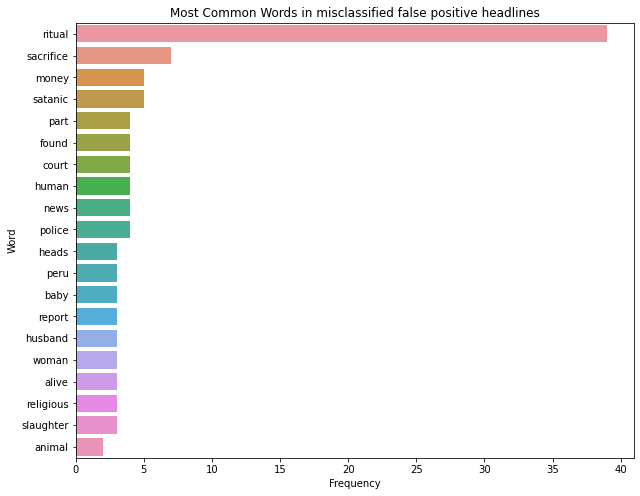

In [32]:
cw = Common_words_plot(misclassified_false_positive_headlines_words,'Headlines',20,'misclassified false positive headlines')

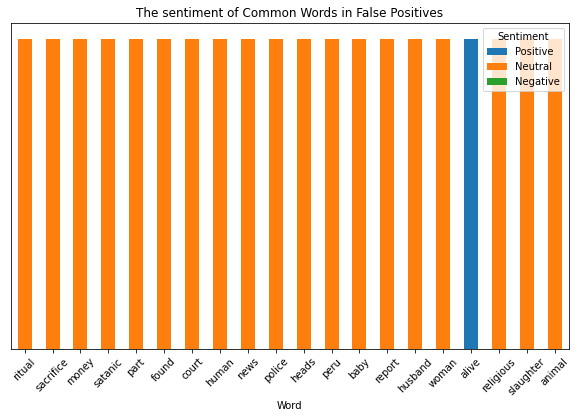

In [33]:
# Example list of common words from false positives
common_words = [tuple[0] for tuple in cw]

# Calculate sentiment scores
sentiments = [analyzer.polarity_scores(word) for word in common_words]

# Prepare DataFrame
df_sentiments = pd.DataFrame(sentiments, index=common_words)

# Plot
df_sentiments[['pos', 'neu', 'neg']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('The sentiment of Common Words in False Positives')
plt.xlabel('Word')
plt.ylabel('Score')
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_visible(False)
plt.show()

[('ritual', 4), ('moon', 2), ('help', 2), ('new', 1), ('cutting', 1), ('cord', 1), ('limiting', 1), ('beliefs', 1), ('mindbodygreen.com', 1), ('pink', 1), ('shed', 1), ('bad', 1), ('shit', 1), ('clogging', 1), ('soul', 1), ('javanese', 1), ('bridal', 1), ('called', 1), ("'doa", 1), ('sembogo', 1)]


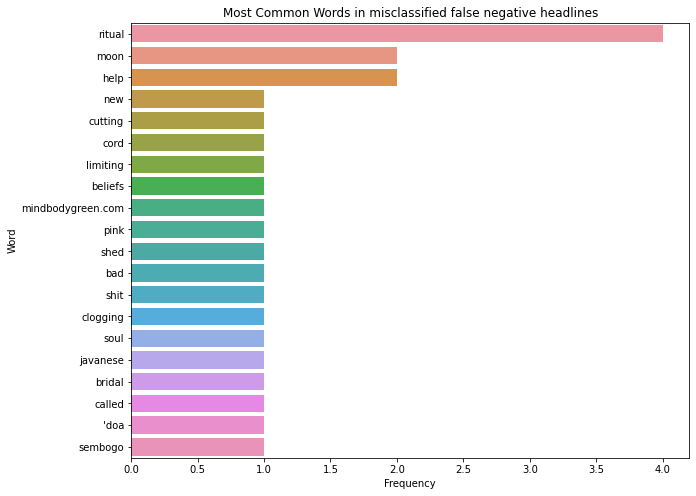

In [34]:
cw = Common_words_plot(misclassified_false_negative_headlines_words,'Headlines',20,'misclassified false negative headlines')

In [35]:
misclassified_false_negative_headlines_words

,Date,Headlines,Author,Tag Text,True_Label,Vader_Headlines_sentiment_score,Vader_Headlines_compound_score,Vader_Tag Text_sentiment_score,Vader_Tag Text_compound_score,Vader_Headlines_Predicted_Label,Vader_Tag Text_Predicted_Label
5,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive,"{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...",-0.1280,"{'neg': 0.049, 'neu': 0.857, 'pos': 0.094, 'co...",0.3468,negative,positive
71,28/04/2018,A Pink Moon ritual that will help you shed all...,HelloGiggles,"But as they say: out with the old, in with the...",positive,"{'neg': 0.298, 'neu': 0.588, 'pos': 0.113, 'co...",-0.6597,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.6124,negative,positive
1050,07/03/2020,This is a Javanese bridal ritual called 'Doa S...,Mashable SE Asia,Instead of the false impression of buying a pa...,positive,"{'neg': 0.199, 'neu': 0.663, 'pos': 0.139, 'co...",-0.2500,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.5367,negative,positive
1178,06/06/2020,Josh Gad reveals sweet ritual with his two dau...,Daily Mail,It really is meant to be this pure sweetness.'...,positive,"{'neg': 0.186, 'neu': 0.679, 'pos': 0.136, 'co...",-0.2732,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.7351,negative,positive
1384,17/10/2020,Marriage or not? Rituals help dating couples d...,Science Daily,Rituals such as those centered around holidays...,positive,"{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",-0.3089,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.7003,negative,positive


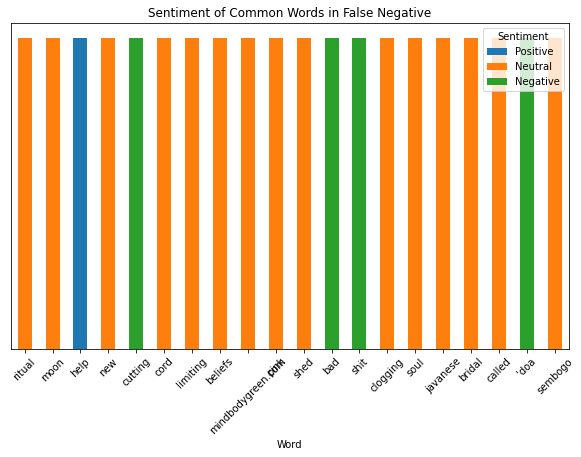

In [36]:
# Example list of common words from false positives
common_words = [tuple[0] for tuple in cw]

# Calculate sentiment scores
sentiments = [analyzer.polarity_scores(word) for word in common_words]

# Prepare DataFrame
df_sentiments = pd.DataFrame(sentiments, index=common_words)

# Plot
df_sentiments[['pos', 'neu', 'neg']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment of Common Words in False Negative')
plt.xlabel('Word')
plt.ylabel('Score')
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_visible(False)
plt.show()

[('ritual', 23), ('state', 9), ('police', 5), ('rituals', 5), ('money', 4), ('two', 4), ('said', 4), ('satanic', 4), ('told', 3), ('court', 3), ('new', 3), ('capital', 3), ('best', 3), ('people', 3), ('men', 3), ('national', 3), ('baby', 3), ('part', 3), ('known', 3), ('friday', 3)]


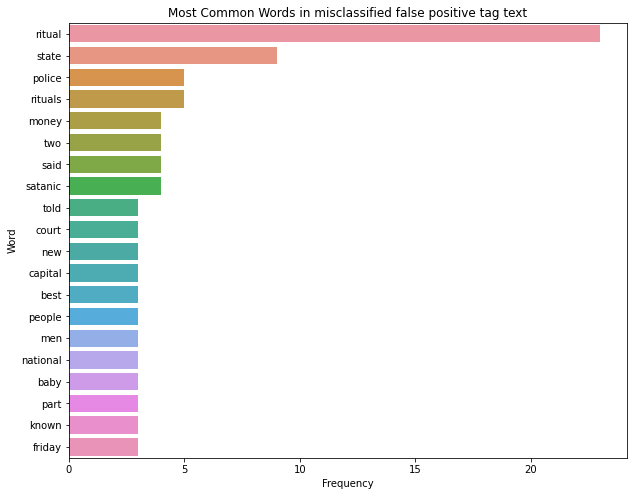

[('ritual', 23),
 ('state', 9),
 ('police', 5),
 ('rituals', 5),
 ('money', 4),
 ('two', 4),
 ('said', 4),
 ('satanic', 4),
 ('told', 3),
 ('court', 3),
 ('new', 3),
 ('capital', 3),
 ('best', 3),
 ('people', 3),
 ('men', 3),
 ('national', 3),
 ('baby', 3),
 ('part', 3),
 ('known', 3),
 ('friday', 3)]

In [37]:
Common_words_plot(misclassified_false_positive_tagtext_words,'Tag Text',20,'misclassified false positive tag text')

[('ritual', 3), ("'m", 3), ('even', 3), ('magick', 2), ('full', 2), ('moon', 2), ('get', 2), ('rituals', 2), ("'ve", 2), ('time', 2), ('found', 2), ('people', 2), ('new', 2), ('year', 2), ('word', 2), ("n't", 2), ('high', 1), ('priestess', 1), ('innately', 1), ('connected', 1)]


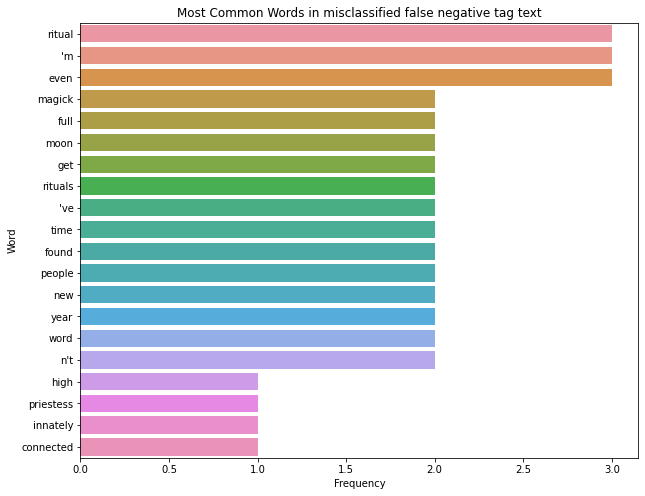

[('ritual', 3),
 ("'m", 3),
 ('even', 3),
 ('magick', 2),
 ('full', 2),
 ('moon', 2),
 ('get', 2),
 ('rituals', 2),
 ("'ve", 2),
 ('time', 2),
 ('found', 2),
 ('people', 2),
 ('new', 2),
 ('year', 2),
 ('word', 2),
 ("n't", 2),
 ('high', 1),
 ('priestess', 1),
 ('innately', 1),
 ('connected', 1)]

In [38]:
Common_words_plot(misclassified_false_negative_tagtext_words,'Tag Text',20,'misclassified false negative tag text')

Use ngrams from nltk package to do N-grams Analysis: Identify frequent 2-grams in misclassified texts to discover any interesting things in word combinations, especially the headlines composed with relatively small number of words for concisely passing the info which provides more evident contexual understanding in terms of sentiment.

In [39]:
from nltk import ngrams

Analysis on false positive headlines cases

In [40]:
misclassified_words = [word_tokenize(text.lower()) for text in misclassified_false_positive_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]

In [41]:
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('animal', 'heads'),
 ('heads', ','),
 (',', 'possibly'),
 ('possibly', 'part'),
 ('part', 'of'),
 ('of', 'ritual'),
 ('ritual', ','),
 (',', 'found'),
 ('found', 'in'),
 ('in', 'harvard'),
 ('harvard', 'square'),
 ('square', 'trash'),
 ('trash', 'mantsoe'),
 ('mantsoe', 'confessed'),
 ('confessed', 'to'),
 ('to', 'blood'),
 ('blood', 'ritual'),
 ('ritual', 'with'),
 ('with', 'mokoena'),
 ('mokoena', ','),
 (',', 'court'),
 ('court', 'told'),
 ('told', 'peru'),
 ('peru', 'unearths'),
 ('unearths', 'evidence'),
 ('evidence', 'of'),
 ('of', 'ancient'),
 ('ancient', 'mass'),
 ('mass', 'child'),
 ('child', 'sacrifice'),
 ('sacrifice', 'ritual'),
 ('ritual', 'there'),
 ('there', 'will'),
 ('will', 'be'),
 ('be', 'blood'),
 ('blood', ':'),
 (':', 'earliest'),
 ('earliest', 'evidence'),
 ('evidence', 'of'),
 ('of', 'ritual'),
 ('ritual', 'vengeance'),
 ('vengeance', 'found'),
 ('found', 'near'),
 ('near', '56'),
 ('56', 'child'),
 ('child', 'skeletons'),
 ('skeletons', 'found'),
 ('found', '

In [42]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams
# Convert to DataFrame for better visualization
df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                 n-gram  Frequency
0           (ritual, ,)          5
1           (ritual, ?)          5
2                (?, )          5
3                (, ?)          5
4            (part, of)          4
5       (money, ritual)          4
6     (satanic, ritual)          4
7          (for, money)          4
8         (for, ritual)          4
9           (found, in)          3
10  (sacrifice, ritual)          3
11             (me, to)          3
12      (animal, heads)          2
13         (of, ritual)          2
14       (evidence, of)          2
15        (of, ancient)          2
16   (human, sacrifice)          2
17       (hundreds, of)          2
18         (have, been)          2
19          (ritual, ')          2
20        (my, husband)          2
21  (husband, subjects)          2
22       (subjects, me)          2
23       (to, marathon)          2
24      (marathon, sex)          2
25           (sex, for)          2
26       (tells, court)          2
27         (pradesh,

Analysis on false negative headlines cases

In [43]:
misclassified_words = [word_tokenize(text.lower()) for text in misclassified_false_negative_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('a', 'new'),
 ('new', 'moon'),
 ('moon', 'ritual'),
 ('ritual', 'for'),
 ('for', 'cutting'),
 ('cutting', 'the'),
 ('the', 'cord'),
 ('cord', 'on'),
 ('on', 'limiting'),
 ('limiting', 'beliefs'),
 ('beliefs', 'mindbodygreen.com'),
 ('mindbodygreen.com', 'a'),
 ('a', 'pink'),
 ('pink', 'moon'),
 ('moon', 'ritual'),
 ('ritual', 'that'),
 ('that', 'will'),
 ('will', 'help'),
 ('help', 'you'),
 ('you', 'shed'),
 ('shed', 'all'),
 ('all', 'the'),
 ('the', 'bad'),
 ('bad', 'shit'),
 ('shit', 'that'),
 ('that', "'s"),
 ("'s", 'clogging'),
 ('clogging', 'your'),
 ('your', 'soul'),
 ('soul', 'this'),
 ('this', 'is'),
 ('is', 'a'),
 ('a', 'javanese'),
 ('javanese', 'bridal'),
 ('bridal', 'ritual'),
 ('ritual', 'called'),
 ('called', "'doa"),
 ("'doa", 'sembogo'),
 ('sembogo', "'"),
 ("'", '.'),
 ('.', 'here'),
 ('here', "'s"),
 ("'s", 'why'),
 ('why', 'it'),
 ('it', "'s"),
 ("'s", 'meaningful'),
 ('meaningful', '.'),
 ('.', 'josh'),
 ('josh', 'gad'),
 ('gad', 'reveals'),
 ('reveals', 'sweet'),

In [44]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams

df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                          n-gram  Frequency
0                 (moon, ritual)          2
1                       (a, new)          1
2                    (new, moon)          1
3                  (ritual, for)          1
4                 (for, cutting)          1
5                 (cutting, the)          1
6                    (the, cord)          1
7                     (cord, on)          1
8                 (on, limiting)          1
9            (limiting, beliefs)          1
10  (beliefs, mindbodygreen.com)          1
11        (mindbodygreen.com, a)          1
12                     (a, pink)          1
13                  (pink, moon)          1
14                (ritual, that)          1
15                  (that, will)          1
16                  (will, help)          1
17                   (help, you)          1
18                   (you, shed)          1
19                   (shed, all)          1
20                    (all, the)          1
21                    (the, bad)

Analysis on false positive tag text cases

In [45]:
misclassified_words = [word_tokenize(text.lower()) for text in misclassified_false_positive_tagtext_words['Tag Text']]
words_list = [item for sublist in misclassified_words for item in sublist]
n = 3  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('johannesburg', '-', 'a'),
 ('-', 'a', 'police'),
 ('a', 'police', 'officer'),
 ('police', 'officer', 'testifying'),
 ('officer', 'testifying', 'in'),
 ('testifying', 'in', 'sandile'),
 ('in', 'sandile', 'mantsoe'),
 ('sandile', 'mantsoe', "'s"),
 ('mantsoe', "'s", 'murdertrial'),
 ("'s", 'murdertrial', 'has'),
 ('murdertrial', 'has', 'told'),
 ('has', 'told', 'the'),
 ('told', 'the', 'court'),
 ('the', 'court', 'in'),
 ('court', 'in', 'that'),
 ('in', 'that', 'the'),
 ('that', 'the', 'accused'),
 ('the', 'accused', 'confessed'),
 ('accused', 'confessed', 'to'),
 ('confessed', 'to', 'performing'),
 ('to', 'performing', 'a'),
 ('performing', 'a', 'bloodritual'),
 ('a', 'bloodritual', 'with'),
 ('bloodritual', 'with', 'karabo'),
 ('with', 'karabo', 'mokoena'),
 ('karabo', 'mokoena', 'in'),
 ('mokoena', 'in', 'a'),
 ('in', 'a', 'bid'),
 ('a', 'bid', 'to'),
 ('bid', 'to', 'boost'),
 ('to', 'boost', 'his'),
 ('boost', 'his', 'business'),
 ('his', 'business', '.'),
 ('business', '.', 'cons

In [46]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(50)  # Adjust the number to see more or fewer common n-grams

df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                            n-gram  Frequency
0                        (?, , ?)         15
1                (ritual, on, the)          2
2                        (?, ?, n)          2
3                   (a, group, of)          2
4               (members, of, the)          2
5           (the, satanic, temple)          2
6                      (..., ?, )          2
7             (johannesburg, -, a)          1
8                   (-, a, police)          1
9             (a, police, officer)          1
10   (police, officer, testifying)          1
11       (officer, testifying, in)          1
12       (testifying, in, sandile)          1
13          (in, sandile, mantsoe)          1
14          (sandile, mantsoe, 's)          1
15      (mantsoe, 's, murdertrial)          1
16          ('s, murdertrial, has)          1
17        (murdertrial, has, told)          1
18                (has, told, the)          1
19              (told, the, court)          1
20                (the, court, in)

Analysis on false negative tag text cases

In [47]:
misclassified_words = [word_tokenize(text.lower()) for text in misclassified_false_negative_tagtext_words['Tag Text']]
words_list = [item for sublist in misclassified_words for item in sublist]
n = 3  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('the', 'high', 'priestess'),
 ('high', 'priestess', 'is'),
 ('priestess', 'is', 'innately'),
 ('is', 'innately', 'connected'),
 ('innately', 'connected', 'to'),
 ('connected', 'to', 'intuition'),
 ('to', 'intuition', ','),
 ('intuition', ',', 'our'),
 (',', 'our', 'magick'),
 ('our', 'magick', ','),
 ('magick', ',', 'thedivine'),
 (',', 'thedivine', 'feminine'),
 ('thedivine', 'feminine', ','),
 ('feminine', ',', 'cycles'),
 (',', 'cycles', 'of'),
 ('cycles', 'of', 'death'),
 ('of', 'death', 'and'),
 ('death', 'and', 'rebirth'),
 ('and', 'rebirth', ','),
 ('rebirth', ',', 'and'),
 (',', 'and', 'spiritual'),
 ('and', 'spiritual', 'mysteries'),
 ('spiritual', 'mysteries', '.'),
 ('mysteries', '.', 'ifyou'),
 ('.', 'ifyou', 'want'),
 ('ifyou', 'want', 'to'),
 ('want', 'to', 'sow'),
 ('to', 'sow', 'some'),
 ('sow', 'some', 'seeds'),
 ('some', 'seeds', 'of'),
 ('seeds', 'of', 'magick'),
 ('of', 'magick', 'this'),
 ('magick', 'this', 'full'),
 ('this', 'full', 'blue'),
 ('full', 'blue', 'm

In [48]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams

df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                         n-gram  Frequency
0                     (?, , ?)          4
1        (the, high, priestess)          1
2         (high, priestess, is)          1
3     (priestess, is, innately)          1
4     (is, innately, connected)          1
5     (innately, connected, to)          1
6    (connected, to, intuition)          1
7            (to, intuition, ,)          1
8           (intuition, ,, our)          1
9              (,, our, magick)          1
10             (our, magick, ,)          1
11       (magick, ,, thedivine)          1
12     (,, thedivine, feminine)          1
13     (thedivine, feminine, ,)          1
14        (feminine, ,, cycles)          1
15              (,, cycles, of)          1
16          (cycles, of, death)          1
17             (of, death, and)          1
18        (death, and, rebirth)          1
19            (and, rebirth, ,)          1
20            (rebirth, ,, and)          1
21          (,, and, spiritual)          1
22  (and, s

Check the scoring of those key words or the combination of key words found from previous N-grams analysis and most commond word plot, and see what Vader returns.

In [49]:
print('Sentiment score on ("sacrifice ritual"):')
print(analyzer.polarity_scores('sacrifice ritual'))
print('Sentiment score on ("moon ritual"):')
print(analyzer.polarity_scores('moon ritual'))
print('Sentiment score on ("money ritual"):')
print(analyzer.polarity_scores('money ritual'))
print('Sentiment score on ("satanic ritual put alive people in fire"):')
print(analyzer.polarity_scores('satanic ritual put alive people in fire'))

Sentiment score on ("sacrifice ritual"):
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score on ("moon ritual"):
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score on ("money ritual"):
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score on ("satanic ritual put alive people in fire"):
{'neg': 0.24, 'neu': 0.5, 'pos': 0.26, 'compound': 0.0516}


The length of text seems also impact the accuracy of classification, such that the accuracy using tag text is much lower than the  accuracy by headline.

So let's plot the distribution of text lengths for correctly classified vs. misclassified texts for both tag text and headlines.

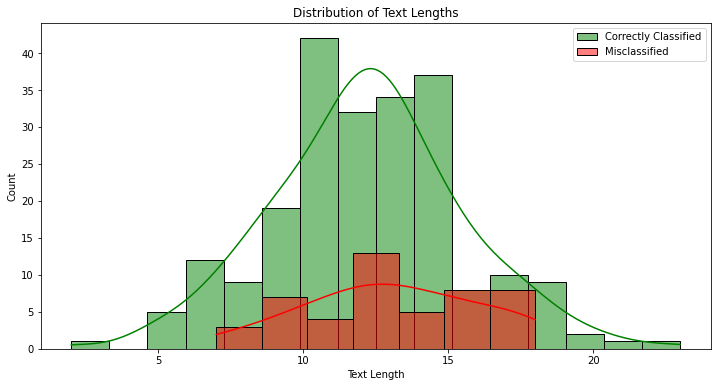

In [50]:
correctly_classified_headlines = df_copy[df_copy['Vader_Headlines_Predicted_Label'] == df_copy['True_Label']]

# Calculate text lengths
misclassified_headlines['text_length'] = misclassified_headlines['Headlines'].apply(lambda x: len(word_tokenize(x)))
correctly_classified_headlines['text_length'] = correctly_classified_headlines['Headlines'].apply(lambda x: len(word_tokenize(x)))


# Separate correctly classified and misclassified texts
correct_texts_length = correctly_classified_headlines['text_length']
misclassified_texts_length = misclassified_headlines['text_length']

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(correct_texts_length, color="green", kde=True, label='Correctly Classified')
sns.histplot(misclassified_texts_length, color="red", kde=True, label='Misclassified')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.legend()
plt.show()

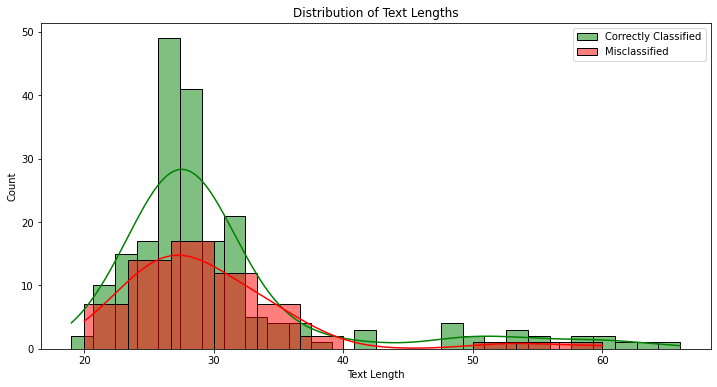

In [51]:
correctly_classified_tagtext = df_copy[df_copy['Vader_Tag Text_Predicted_Label'] == df_copy['True_Label']]

misclassified_tagtext['text_length'] = misclassified_tagtext['Tag Text'].apply(lambda x: len(word_tokenize(x)))
correctly_classified_tagtext['text_length'] = correctly_classified_tagtext['Tag Text'].apply(lambda x: len(word_tokenize(x)))

# Separate correctly classified and misclassified texts
correct_texts_length = correctly_classified_tagtext['text_length']
misclassified_texts_length = misclassified_tagtext['text_length']


# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(correct_texts_length, color="green", kde=True, label='Correctly Classified')
sns.histplot(misclassified_texts_length, color="red", kde=True, label='Misclassified')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.legend()
plt.show()

Wordcloud to see those most appearing common words in headlines or tag text that Vader tend to classified as positive and negative.

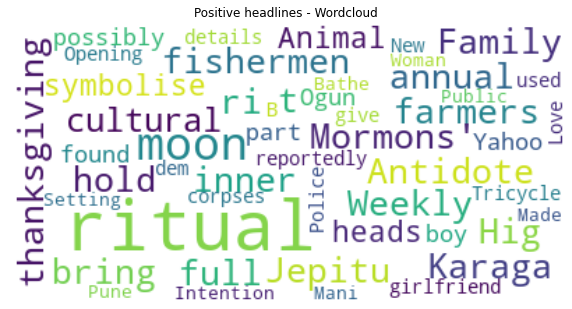

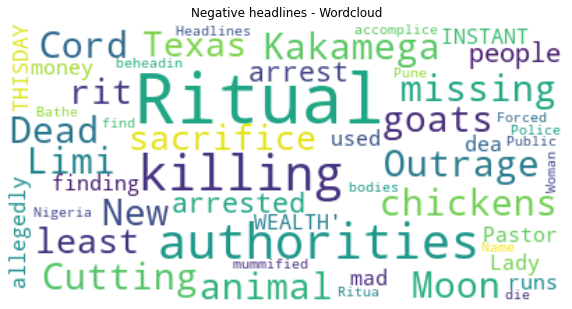

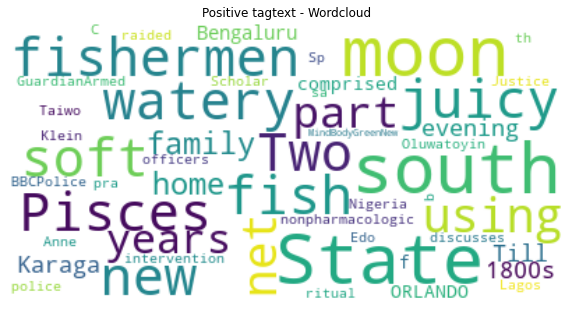

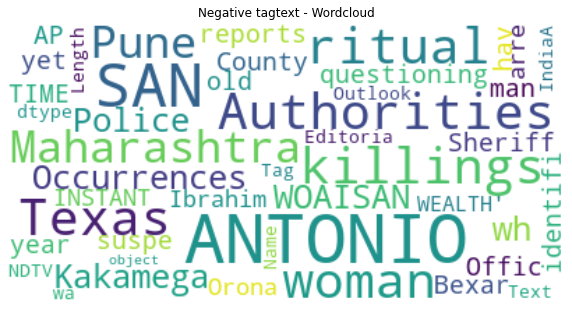

In [52]:
# Wordcloud with positive headlines
Classified_positive_headlines = df_copy['Headlines'][df_copy["Vader_Headlines_Predicted_Label"] == 'positive']
stop_words = ["https",'.com'] + list(STOPWORDS)
positive_headlines_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_positive_headlines))
plt.figure(figsize=(10, 6))
plt.title("Positive headlines - Wordcloud")
plt.imshow(positive_headlines_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative headlines
Classified_negative_headlines = df_copy['Headlines'][df_copy["Vader_Headlines_Predicted_Label"] == 'negative']
stop_words = ["https"] + list(STOPWORDS)
negative_headlines_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_negative_headlines))
plt.figure(figsize=(10, 6))
plt.title("Negative headlines - Wordcloud")
plt.imshow(negative_headlines_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with positive tagtext
Classified_positive_tagtext = df_copy['Tag Text'][df_copy["Vader_Tag Text_Predicted_Label"] == 'positive']
stop_words = ["https"] + list(STOPWORDS)
positive_tagtext_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_positive_tagtext))
plt.figure(figsize=(10, 6))
plt.title("Positive tagtext - Wordcloud")
plt.imshow(positive_tagtext_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tagtext
Classified_negative_tagtext = df_copy['Tag Text'][df_copy["Vader_Tag Text_Predicted_Label"] == 'negative']
stop_words = ["https"] + list(STOPWORDS)
negative_tagtext_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_negative_tagtext))
plt.figure(figsize=(10, 6))
plt.title("Negative tagtext - Wordcloud")
plt.imshow(negative_tagtext_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
# Filter misclassified examples that classified headlines differ from classified tag text
diff_classified_headlines_tagtext = pd.DataFrame()
diff_classified_headlines_tagtext = df_copy[df_copy['Vader_Headlines_Predicted_Label'] != df_copy['Vader_Tag Text_Predicted_Label']]

In [55]:
print('Headline: ' + diff_classified_headlines_tagtext.iloc[7]['Headlines'] + '\n'+ '\nclassified as: ' + diff_classified_headlines_tagtext.iloc[7]['Vader_Headlines_Predicted_Label'] + str(diff_classified_headlines_tagtext.iloc[7]['Vader_Headlines_sentiment_score']))
print('\nTag text: ' + diff_classified_headlines_tagtext.iloc[7]['Tag Text'] + '\n'+ '\nclassified as: ' + diff_classified_headlines_tagtext.iloc[7]['Vader_Tag Text_Predicted_Label'] + str(diff_classified_headlines_tagtext.iloc[7]['Vader_Tag Text_sentiment_score']))

Headline: 9 Daily Rituals to Boost Your Performance at Work (Infographic)

classified as: positive{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}

Tag text: Some rituals might seem like nonsense, but it turns out, they can behelpful when it comes to productivity and job performance. Studies haveshown ...

classified as: negative{'neg': 0.072, 'neu': 0.859, 'pos': 0.068, 'compound': -0.0258}


By human judgement the above tag text should be classified as positive, but vader did opposite of its prediction in corresponding headline and we know long text often compose multiple sentences even paragraph that depend each other to derive an argument, which suggest its obvious weakness as lexicon-based and rule-based that it can not capture the context and coherence of composed sentences or paragraphs as well as mixed sentiment across tag text so leading to misinterpretation of the overall sentiment. And especially the headlines composed with relatively small number of words for concisely passing the info which provides more evident contexual understanding in terms of sentiment.